<a href="https://colab.research.google.com/github/Danika-Balas/msds-458/blob/master/D2_XOR_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Set Up

In [0]:
#import needed
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers

##XOR Data

In [0]:
xor_input = np.array([[0,0],
                       [0,1],
                       [1,0],
                       [1,1]])

In [0]:
xor_labels = np.array([0,1,1,0])

In [0]:
test_input = np.array([[2,2],
                       [2,5],
                       [5,2],
                       [5,5],
                       [3,3],
                       [3,1111],
                       [1111,3],
                       [1111,1111]])
test_labels = np.array([0,1,1,0,0,1,1,0])

##Build Model

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_dim = 2))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
from keras import losses
from keras import optimizers

#Establish accuracy metrics
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
#Fit model to XOR problem
history = model.fit(xor_input, xor_labels, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 34ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 2/500
4/4 [==============================] - 0s 511us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 3/500
4/4 [==============================] - 0s 833us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 4/500
4/4 [==============================] - 0s 600us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 5/500
4/4 [==============================] - 0s 484us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 6/500
4/4 [==============================] - 0s 563us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 7/500
4/4 [==============================] - 0s 586us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 8/500
4/4 [==============================] - 0s 532us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 9/500
4/4 [==============================] - 0s 613us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 10/500
4/4 [==============================] - 0s 755us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 11/5

##Plot Training Loss


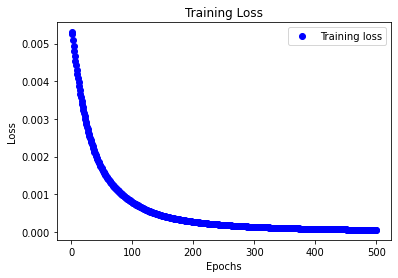

In [0]:
history_dict = history.history
loss_values = history_dict['loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

##Evaluate Accuracy of Model


In [0]:
final_loss, final_acc = model.evaluate(xor_input, xor_labels, verbose=0)
print("Training loss: {0:.6f}, training accuracy: {1:.6f}".format(final_loss, final_acc))

Training loss: 0.000052, training accuracy: 1.000000


####Predict training values

In [0]:
predictions = model.predict(xor_input)
predictions

array([[1.3478928e-04],
       [9.9997854e-01],
       [9.9996591e-01],
       [1.8097706e-05]], dtype=float32)

####Predict test values

In [0]:
test_predictions = model.predict(test_input)
test_predictions

array([[1.5034642e-08],
       [1.0000000e+00],
       [1.0000000e+00],
       [8.6207283e-18],
       [1.2490386e-11],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00]], dtype=float32)

In [0]:
test_predictions.round()

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [0]:
test_labels

array([0, 1, 1, 0, 0, 1, 1, 0])